# Goal :  Predict the  Selling Price of a Car.

## Import Libraries

In [1]:
import pandas as pd

## Read Data

In [2]:
df= pd.read_csv("car_data.csv")

In [3]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


## Perform EDA 

In [4]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
[0 1 3]


In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Data Cleaning and Feature Engineering

In [6]:
df_1 = df.drop("Car_Name", axis=1)

In [7]:
df_1['Selling_Price'] = df_1['Selling_Price']*100000
df_1['Present_Price'] = df_1['Present_Price']*100000


In [8]:
df_1['Selling_Price'] = df_1['Selling_Price']/81
df_1['Present_Price'] = df_1['Present_Price']/81

In [9]:
df_1

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,4135.802469,6901.234568,27000,Petrol,Dealer,Manual,0
1,2013,5864.197531,11777.777778,43000,Diesel,Dealer,Manual,0
2,2017,8950.617284,12160.493827,6900,Petrol,Dealer,Manual,0
3,2011,3518.518519,5123.456790,5200,Petrol,Dealer,Manual,0
4,2014,5679.012346,8481.481481,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,11728.395062,14320.987654,33988,Diesel,Dealer,Manual,0
297,2015,4938.271605,7283.950617,60000,Petrol,Dealer,Manual,0
298,2009,4135.802469,13580.246914,87934,Petrol,Dealer,Manual,0
299,2017,14197.530864,15432.098765,9000,Diesel,Dealer,Manual,0


In [10]:
df_1['Current Year']=2022



In [11]:
df_1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,4135.802469,6901.234568,27000,Petrol,Dealer,Manual,0,2022
1,2013,5864.197531,11777.777778,43000,Diesel,Dealer,Manual,0,2022
2,2017,8950.617284,12160.493827,6900,Petrol,Dealer,Manual,0,2022
3,2011,3518.518519,5123.456790,5200,Petrol,Dealer,Manual,0,2022
4,2014,5679.012346,8481.481481,42450,Diesel,Dealer,Manual,0,2022


In [12]:
df_1['number_year']=df_1['Current Year']- df_1['Year']


In [13]:
df_1.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,number_year
0,2014,4135.802469,6901.234568,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,5864.197531,11777.777778,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,8950.617284,12160.493827,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,3518.518519,5123.456790,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,5679.012346,8481.481481,42450,Diesel,Dealer,Manual,0,2022,8


In [14]:
df_1.drop(['Year','Current Year'], axis=1,inplace=True)

In [15]:
df_1.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,number_year
0,4135.802469,6901.234568,27000,Petrol,Dealer,Manual,0,8
1,5864.197531,11777.777778,43000,Diesel,Dealer,Manual,0,9
2,8950.617284,12160.493827,6900,Petrol,Dealer,Manual,0,5
3,3518.518519,5123.456790,5200,Petrol,Dealer,Manual,0,11
4,5679.012346,8481.481481,42450,Diesel,Dealer,Manual,0,8


## Encoding

In [16]:
df_1 =pd.get_dummies(df_1,drop_first=True)

In [17]:
df_1.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,4135.802469,6901.234568,27000,0,8,0,1,0,1
1,5864.197531,11777.777778,43000,0,9,1,0,0,1
2,8950.617284,12160.493827,6900,0,5,0,1,0,1
3,3518.518519,5123.456790,5200,0,11,0,1,0,1
4,5679.012346,8481.481481,42450,0,8,1,0,0,1


## EDA

In [18]:
df_1.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,number_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
number_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [19]:
import seaborn as sns

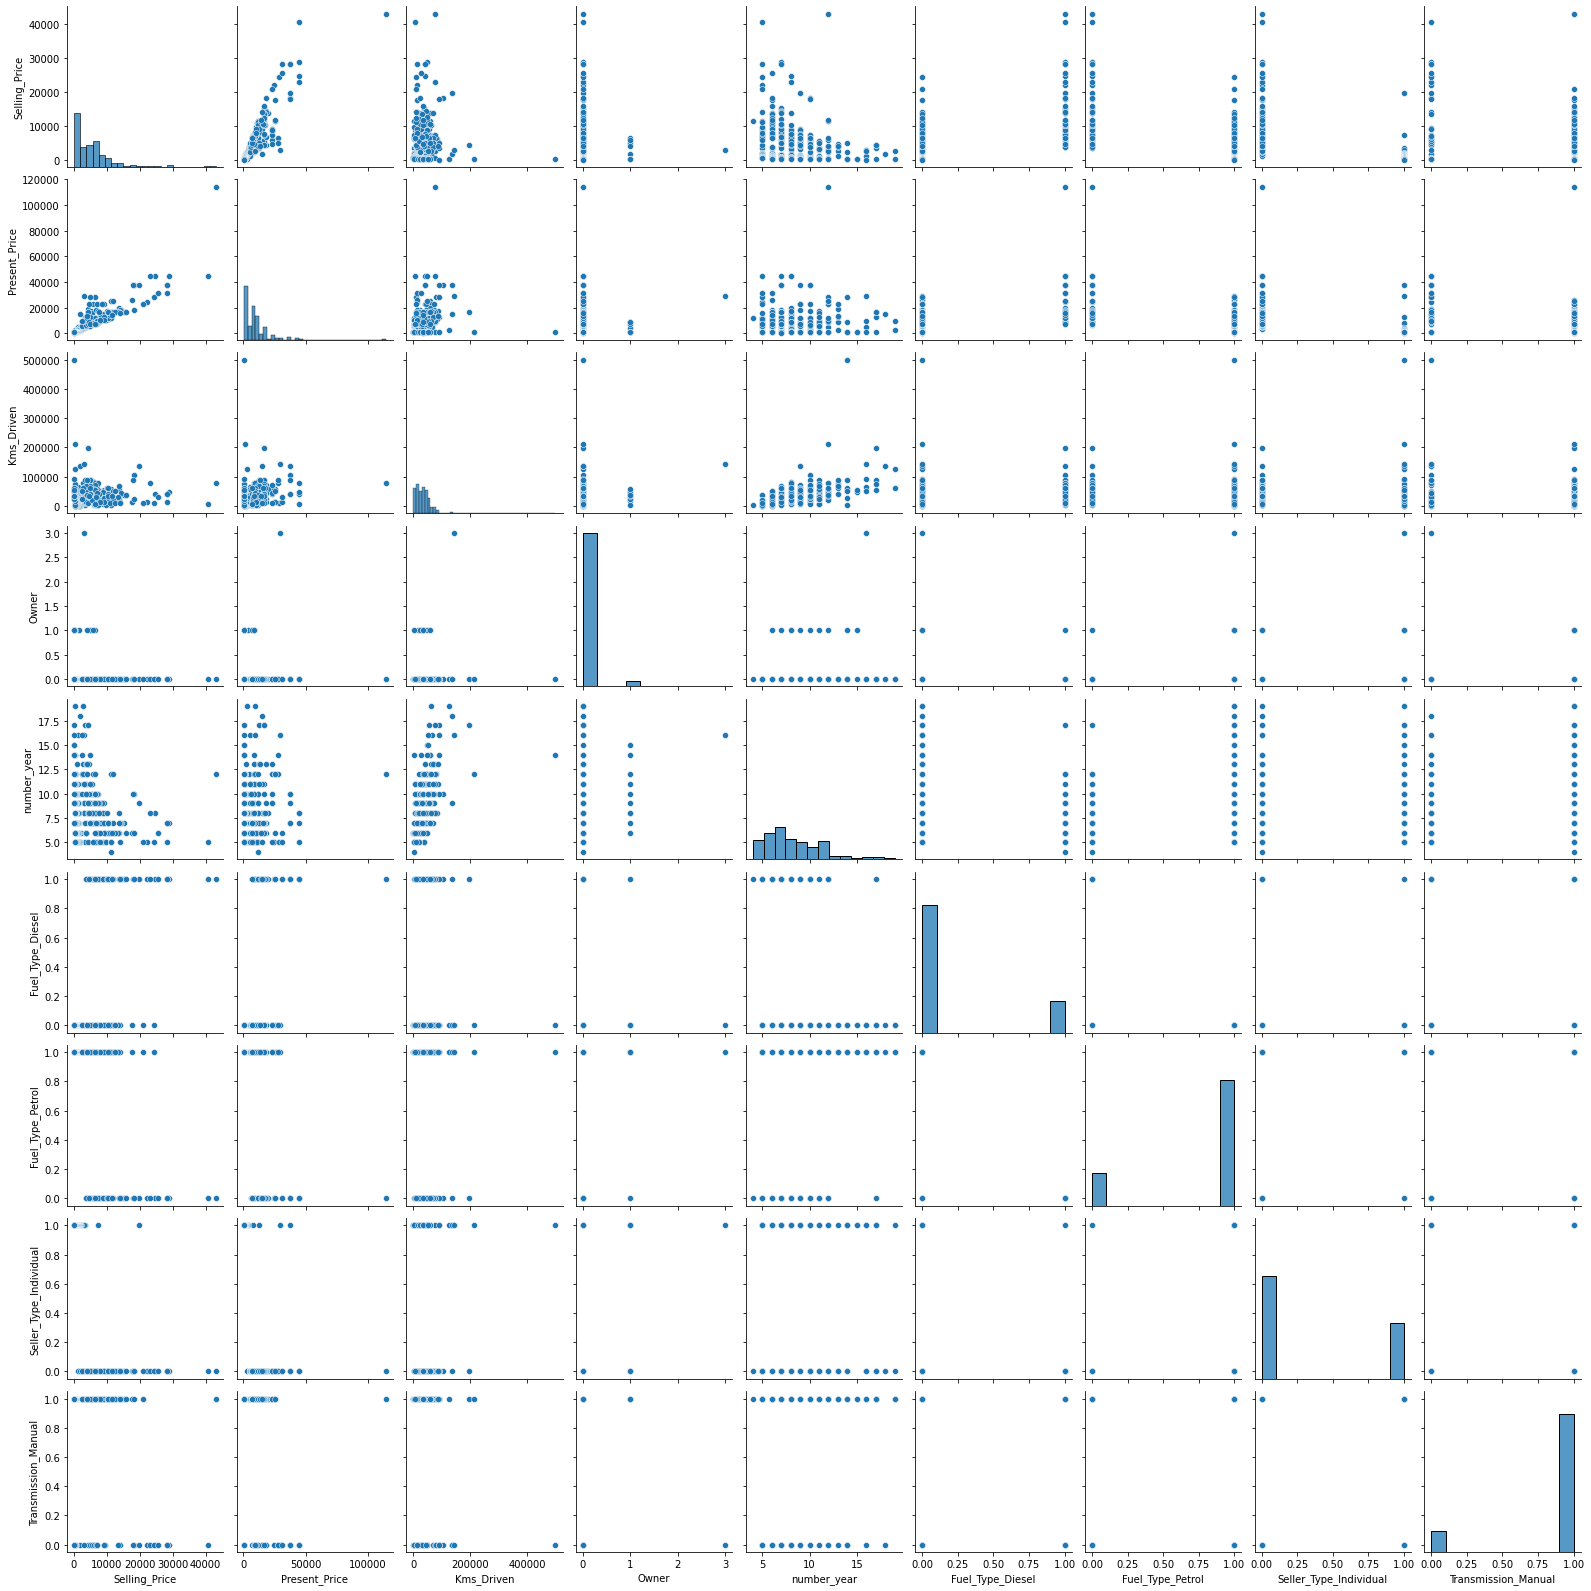

In [20]:
sns.pairplot(df_1)

In [21]:
import matplotlib.pyplot as plt

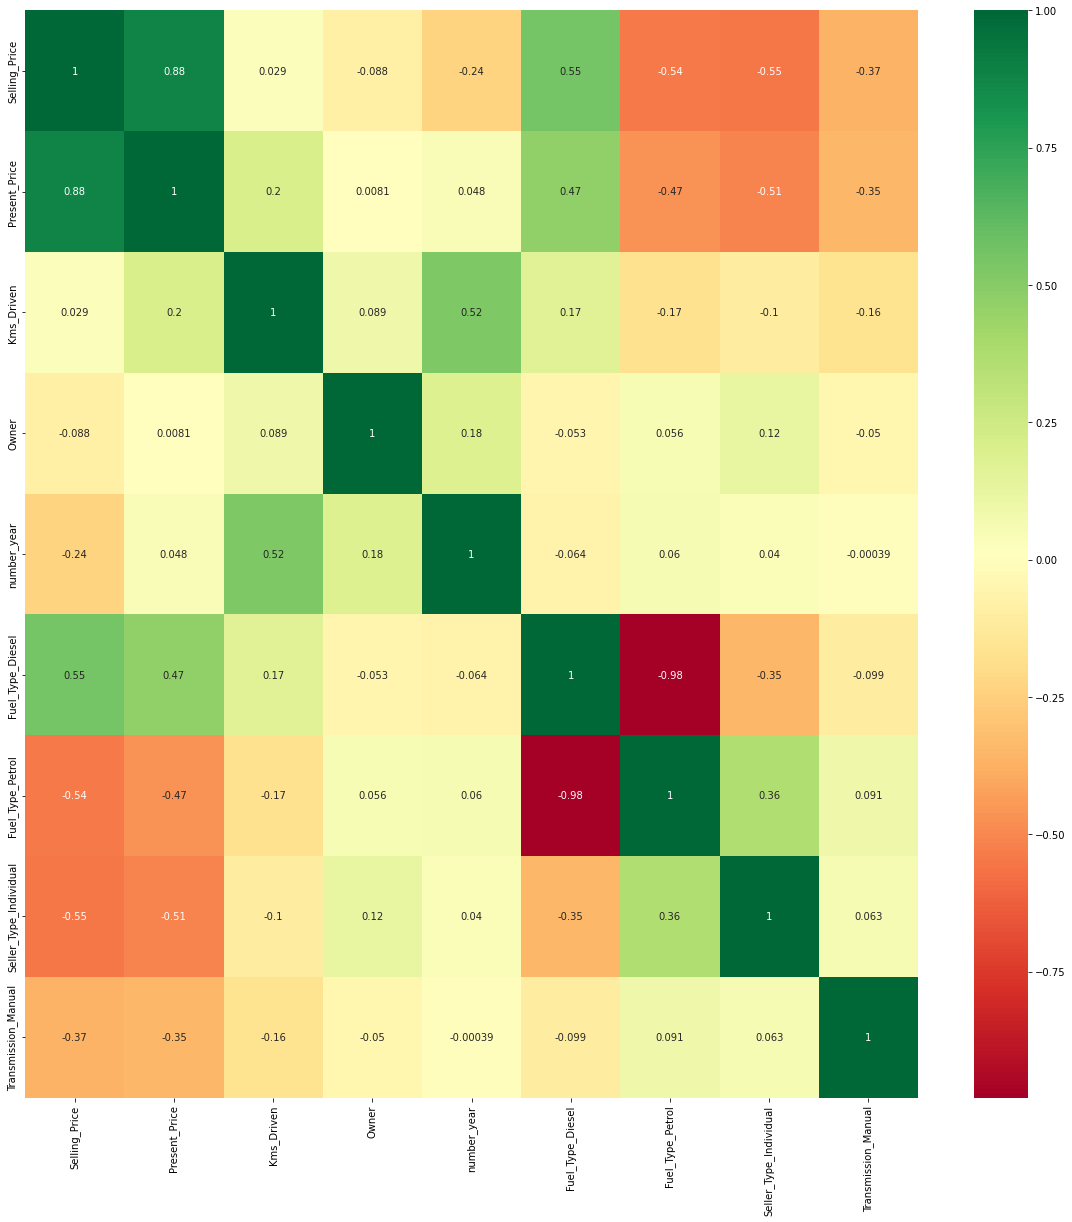

In [22]:
#get correlations of each features in dataset
corrmat = df_1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Defining target and features

In [23]:
X=df_1.drop("Selling_Price",axis=1)


In [24]:
X

,Present_Price,Kms_Driven,Owner,number_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,6901.234568,27000,0,8,0,1,0,1
1,11777.777778,43000,0,9,1,0,0,1
2,12160.493827,6900,0,5,0,1,0,1
3,5123.456790,5200,0,11,0,1,0,1
4,8481.481481,42450,0,8,1,0,0,1
...,...,...,...,...,...,...,...,...
296,14320.987654,33988,0,6,1,0,0,1
297,7283.950617,60000,0,7,0,1,0,1
298,13580.246914,87934,0,13,0,1,0,1
299,15432.098765,9000,0,5,1,0,0,1


In [25]:
y = df_1["Selling_Price"]

In [26]:
y

0       4135.802469
1       5864.197531
2       8950.617284
3       3518.518519
4       5679.012346
           ...     
296    11728.395062
297     4938.271605
298     4135.802469
299    14197.530864
300     6543.209877
Name: Selling_Price, Length: 301, dtype: float64

## Feature Importance

In [27]:


from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [28]:

print(model.feature_importances_)

[0.41228874 0.03955984 0.0004594  0.07970058 0.21112381 0.01502472
 0.11630318 0.12553973]


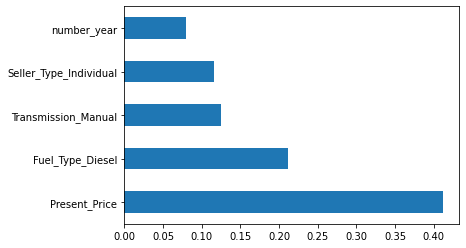

In [29]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [30]:
import numpy as np

## train_test_split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Import Estimators

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
regressor=RandomForestRegressor()

## Tuning hyperperameter through RandomizedSearchCV 

In [34]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:

 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

## Create the Random Grid

In [37]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


## Train the Model

In [38]:
rf = RandomForestRegressor()

In [39]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs=1) 

In [40]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

## Findind The Best Parameter

In [41]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
rf_random.best_score_

-6092771.42941812

## Make The Prediction

In [43]:
predictions=rf_random.predict(X_test)

C:\Users\monik\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

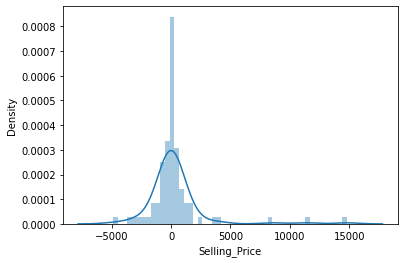

In [44]:
sns.distplot(y_test-predictions)

## Save the Model

In [45]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)